# Análises

## Lojas e Produtos que mais vendem

In [1]:
import pandas as pd

In [2]:
# Lendo arquivo excel
dfClientes   = pd.read_excel('caso_estudo.xlsx', sheet_name = 'clientes')
dfLojas      = pd.read_excel('caso_estudo.xlsx', sheet_name = 'lojas')
dfProdutos   = pd.read_excel('caso_estudo.xlsx', sheet_name = 'produtos')
dfVendas     = pd.read_excel('caso_estudo.xlsx', sheet_name = 'vendas')
dfPagamentos = pd.read_excel('caso_estudo.xlsx', sheet_name = 'pagamentos')

In [3]:
# Corrigindo o index
dfClientes   = dfClientes.set_index('id')
dfLojas      = dfLojas.set_index('id')
dfProdutos   = dfProdutos.set_index('id')
dfVendas     = dfVendas.set_index('id')
dfPagamentos = dfPagamentos.set_index('id')

In [4]:
# Join
df = dfVendas.join( dfClientes.add_prefix('clientes_'), on = 'id_cliente' )
df = df.join( dfLojas.add_prefix('loja_'), on = 'id_loja' )
df = df.join( dfProdutos.add_prefix('produto_'), on = 'id_produto' )
df = df.join(dfPagamentos.set_index('id_venda'))

In [5]:
df

,id_cliente,id_loja,id_produto,dt_venda,clientes_nome,clientes_sexo,clientes_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto
id,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1/4/1950,Palmas,laptop básico,2300.0,2018-01-24
2,417,9,3,2018-01-04,Leonor Almeida,F,1/31/1972,Palmas,laptop básico,2300.0,2018-02-17
3,374,7,8,2018-01-04,André Alves,M,8/3/1962,Salvador,cadeira,540.0,2018-02-14
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,11/5/1941,Belo Horizonte,laptop básico,2300.0,NaT
5,18,9,1,2018-01-05,Antônio Azevedo,M,4/15/1941,Palmas,mouse,20.0,2018-01-23
...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,10/31/1999,Curitiba,carregador,150.0,2020-10-17
2997,586,8,3,2020-09-27,Aline Pinto,F,3/29/1994,Brasília,laptop básico,2300.0,2020-10-02
2998,731,2,4,2020-09-27,Otávio Silva,M,5/4/1986,Rio de Janeiro,laptop gamer,5300.0,NaT


### Receita por Loja

In [6]:
# df[['loja_cidade', 'produto_valor']] -> aplicando um filtro. O Esforço computacional dessa forma é muito inferior,
# pois já está aplicando um filtro no data frame antes de fazer as contas matemáticas
# -- ------------------------
# groupby('loja_cidade') -> Está agrupando pela cidades.
# sum().produto_valor -> está somando todos os produtos vendidos por cidade.
# produto_valor -> estar trabalhando com a coluna `produto_valor`
# sort_values(ascending=False) -> Ordenando do maior para menor
graf_dados = df[['loja_cidade', 'produto_valor']].groupby('loja_cidade').sum().produto_valor.sort_values(ascending=False)
graf_dados

loja_cidade
Rio de Janeiro    191248728.0
Vitória            71008264.0
Curitiba           58101796.0
Salvador           51751732.0
Palmas             48482300.0
Brasília           38910354.0
Recife             38865294.0
Belo Horizonte     35697062.0
Santa Catarina     32423640.0
São Paulo          22817974.0
Name: produto_valor, dtype: float64

Text(0.5, 1.0, 'Receita por Loja')

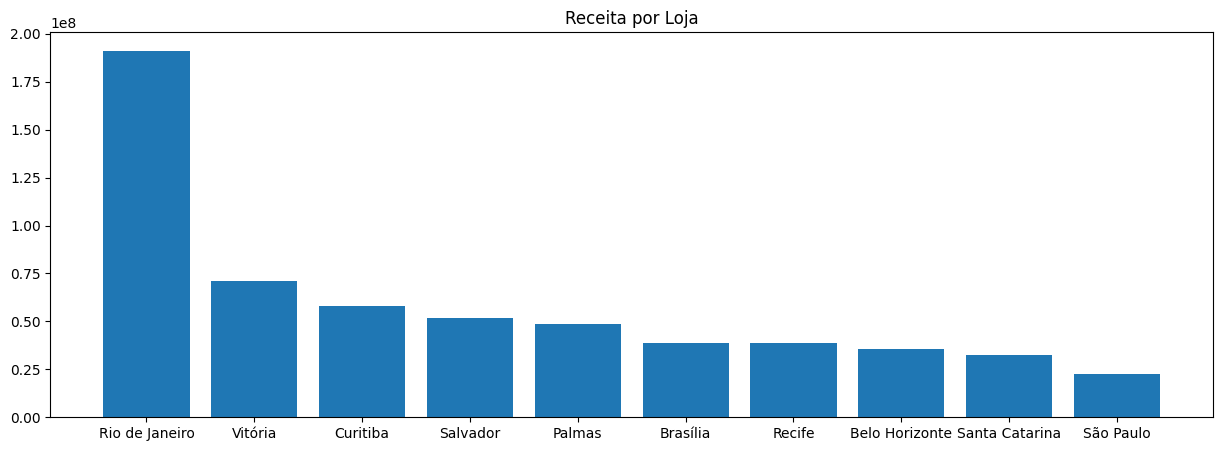

In [7]:
# figsize=(15, 5) -> O tamanho da figura
# plt.bar(categorias, valor) -> Criando um gráfico de barras que cotem a categoria e o valor 
# As categorias está no `graf_dados.index` que são o nome de cada cidade
# O valor está no `graf_dados.values` que são os valores
# title('Vendas por Loja') -> Titulo do gráfico

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Receita por Loja')

In [8]:
print('O maior valor é %i, sendo %.2f vezes a média dos demais, que é %i' % (graf_dados.max(), graf_dados.max() / graf_dados[graf_dados != graf_dados.max()].mean(), graf_dados[graf_dados != graf_dados.max()].mean()))

O maior valor é 191248728, sendo 4.32 vezes a média dos demais, que é 44228712


In [9]:
# Formatado
maiorValor  = graf_dados.max()
porcentagem = graf_dados.max() / graf_dados[graf_dados != graf_dados.max()].mean()
media       = graf_dados[graf_dados != graf_dados.max()].mean()

print('O maior valor é %i, sendo %.2f vezes a média dos demais, que é %i' % (maiorValor, porcentagem, media))

O maior valor é 191248728, sendo 4.32 vezes a média dos demais, que é 44228712


In [10]:
# Descobrir quantos porcentos na média que é a Receita do Rio de Janeiro
# graf_dados.max() -> Está pegando o maior valor, que é o Rio de Janeiro (vai dividir pela media dos demais).
# graf_dados[graf_dados != graf_dados.max()].mean() -> O que ta [] vai ta filtrando e retirando o valor maximo da media

maiorValor  = graf_dados.max()
porcentagem = graf_dados.max() / graf_dados[graf_dados != graf_dados.max()].mean()
media       = graf_dados[graf_dados != graf_dados.max()].mean()

print('O maior valor é %i, sendo %.2f vezes a média dos demais, que é %i' % (maiorValor, porcentagem, media))

O maior valor é 191248728, sendo 4.32 vezes a média dos demais, que é 44228712


## Receita por produto e loja

In [13]:
graf_dados = pd.DataFrame(columns=('Loja', 'Produto', 'Receita'))
for cidade in dfLojas.cidade:
    for produto in dfProdutos.produto:
        graf_dados = pd.concat([pd.DataFrame({
            'Loja' : [cidade],
            'Produto' : [produto],
            'Receita' : [df.produto_valor[(df.loja_cidade == cidade) & (df.produto_produto == produto)].sum()]
        }), graf_dados], ignore_index=True)
graf_dados

,Loja,Produto,Receita
0,Vitória,xxx-231a,70649744.0
1,Vitória,mesa,12040.0
2,Vitória,cadeira,5400.0
3,Vitória,carregador,2100.0
4,Vitória,impressora,8400.0
...,...,...,...
95,São Paulo,monitor,30000.0
96,São Paulo,laptop gamer,63600.0
97,São Paulo,laptop básico,223100.0
98,São Paulo,teclado,510.0


<AxesSubplot: xlabel='None-Produto', ylabel='Loja'>

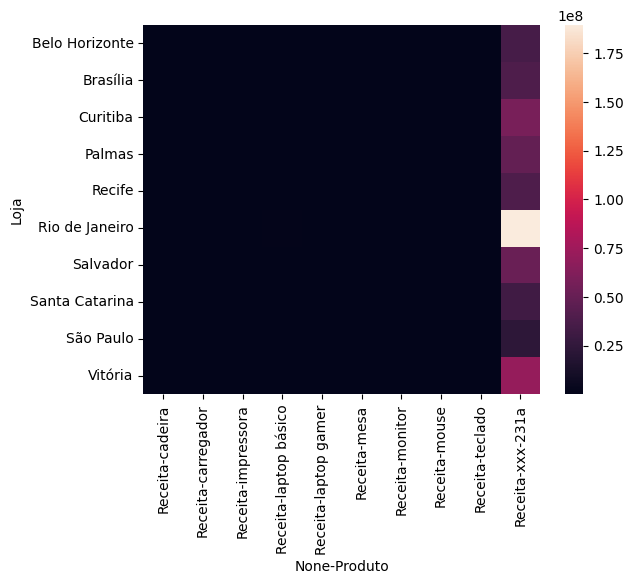

In [16]:
import seaborn as sns
graf_dados = graf_dados.pivot_table(index='Loja', columns='Produto', aggfunc='sum')
sns.heatmap(graf_dados)

In [18]:
graf_dados = pd.DataFrame(columns=('Loja', 'Produto', 'Receita'))
for cidade in dfLojas.cidade:
    for produto in dfProdutos.produto:
        graf_dados = pd.concat([pd.DataFrame({
            'Loja' : [cidade],
            'Produto' : [produto],
            'Receita' : [df.produto_valor[(df.loja_cidade == cidade) & (df.produto_produto == produto)].sum()]
        }), graf_dados], ignore_index=True)
graf_dados = graf_dados.sort_values(by="Receita", ascending=False)
graf_dados

,Loja,Produto,Receita
80,Rio de Janeiro,xxx-231a,189469768.0
0,Vitória,xxx-231a,70649744.0
70,Curitiba,xxx-231a,57804336.0
30,Salvador,xxx-231a,51381632.0
10,Palmas,xxx-231a,48170280.0
...,...,...,...
39,Salvador,mouse,220.0
29,Brasília,mouse,220.0
69,Belo Horizonte,mouse,200.0
59,Santa Catarina,mouse,200.0


In [20]:
graf_dados['lojaprod'] = graf_dados.Loja + '-' + graf_dados.Produto
graf_dados

,Loja,Produto,Receita,lojaprod
80,Rio de Janeiro,xxx-231a,189469768.0,Rio de Janeiro-xxx-231a
0,Vitória,xxx-231a,70649744.0,Vitória-xxx-231a
70,Curitiba,xxx-231a,57804336.0,Curitiba-xxx-231a
30,Salvador,xxx-231a,51381632.0,Salvador-xxx-231a
10,Palmas,xxx-231a,48170280.0,Palmas-xxx-231a
...,...,...,...,...
39,Salvador,mouse,220.0,Salvador-mouse
29,Brasília,mouse,220.0,Brasília-mouse
69,Belo Horizonte,mouse,200.0,Belo Horizonte-mouse
59,Santa Catarina,mouse,200.0,Santa Catarina-mouse


<BarContainer object of 100 artists>

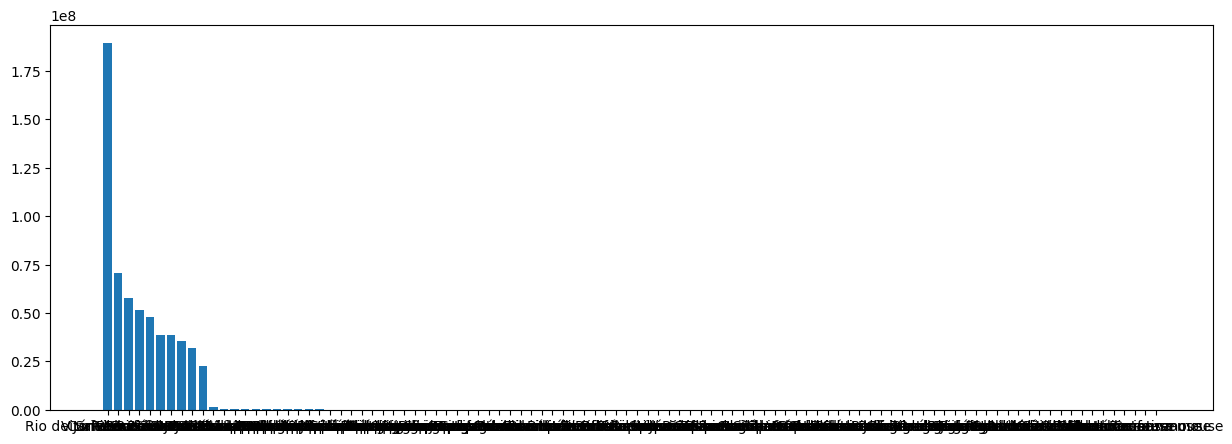

In [22]:
plt.figure(figsize=(15, 5))
plt.bar(graf_dados.lojaprod, graf_dados.Receita)

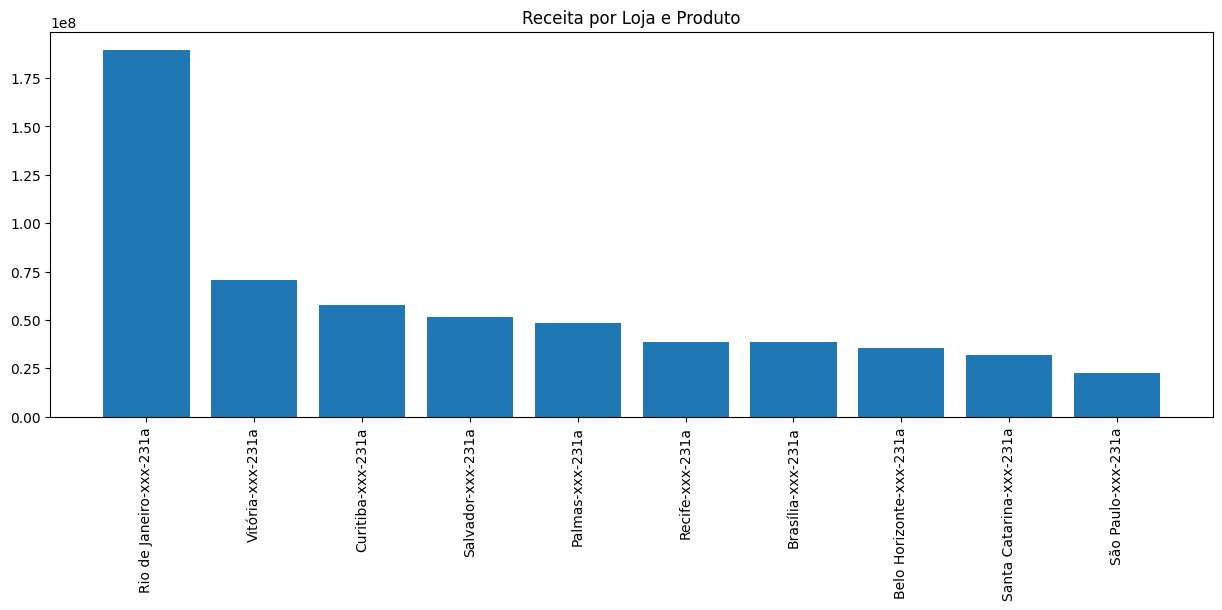

In [30]:
plt.figure(figsize=(15, 5))
plt.bar(graf_dados.lojaprod[graf_dados.Receita > 0.01 * graf_dados.Receita.max()], graf_dados.Receita[graf_dados.Receita > 0.01 * graf_dados.Receita.max()])
plt.xticks(rotation=90)
plt.title('Receita por Loja e Produto')
plt.show()